<h1 style="font-size:2.1em;
           font-family: Calibri
           padding: 20px;
           margin: 20px;
           height: 100px;
           line-height: 100px;
           align-items: center;
           text-align: center;
           border: 3px solid #006400;
           background-color: #f1f1f1;
           ">Covid Tweet Vols & Emoji Sentiment vs Price - Winners</h1>

In [1]:
#import packages
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime, timedelta
from bsi_sentiment.twitter import search_tweets_sn

from advertools import extract_emoji
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

## Loading Quandl API

In [2]:
#get a company's ticker using a key
quandl.ApiConfig.api_key = 'LjVzy1VC64LF83o8h-Ko'

#Get list of tickers
ticker = pd.read_csv('ticker_list.csv')
nasdaq = ticker[ticker["Exchange"] == "NASDAQ"].reset_index(drop = True)

## Working with Twitter Data

In [10]:
#Externally, found a list of winning companies and their Twitter handles
#loading Twitter handles
ListOfTwitterHandles = pd.read_csv('Data/TwitterHandles.csv')
#ListOfTwitterHandles.Symbol.to_list()

#Find all tweets based on Twitter handles
#Unlike the other winning companies, we leave out 'Zoom' since it will be greeatly confused by 
#people who use the term in its intended dictionary meaning
Handles = ['MRNA', 'PYPL', 'ZM']
Tweetlist_BSI_df = pd.DataFrame()

for i, HandleList in enumerate(Handles):
    TweetList_df = pd.DataFrame([])
    for Term in [x.replace(" ","") for x in ListOfTwitterHandles.TwitterHandle[i].split('or')]:        
        print(Term)
        tweets = search_tweets_sn(
        q = str(Term),
        since = "2020-01-19",
        until="2020-04-19",
        lang="en",
        max_tweets=1000000
        )

        TweetList_df = TweetList_df.append(pd.DataFrame(
            [[tweet.date, tweet.text, tweet.username, ListOfTwitterHandles.Company[i], ListOfTwitterHandles.Symbol[i], Term] for tweet in tweets], 
            columns= ['Created','Text','User', 'Company', 'Symbol', 'TwitterTerm']
            ))


    TweetList_df.to_csv("Data/CompanyTweets/" + str(Term[1:]) + "_tweets.csv", index=False)

['MRNA', 'PYPL', 'ZM']

# Tweet Volume Analysis

### Moderna

In [3]:
#load moderna tweets and create a DataFrame
moderna_tweets = pd.read_csv('Data/CompanyTweets/MRNA_tweets.csv')

MRNA_TweetsPerDay = moderna_tweets.pivot_table(index='Created', values='Text', aggfunc='count')
MRNA_TweetsPerDay.reset_index(inplace=True)
MRNA_TweetsPerDay.sort_values(by='Text', ascending=False)

idx = pd.date_range("2020-1-19","2020-4-18")
MRNA_TweetsPerDay.index = pd.DatetimeIndex(MRNA_TweetsPerDay.Created)
MRNA_TweetsPerDay = MRNA_TweetsPerDay.reindex(idx, fill_value=0)
#looking at 5-day moving average to smoothen Twitter counts
MRNA_TweetsPerDay['Count_MA'] = MRNA_TweetsPerDay['Text'].rolling(window=5).mean()

del MRNA_TweetsPerDay['Created']

#load quandl data of moderna stock
MRNA_stock = quandl.get("EOD/MRNA", start_date='2020-1-19', end_date='2020-4-18')

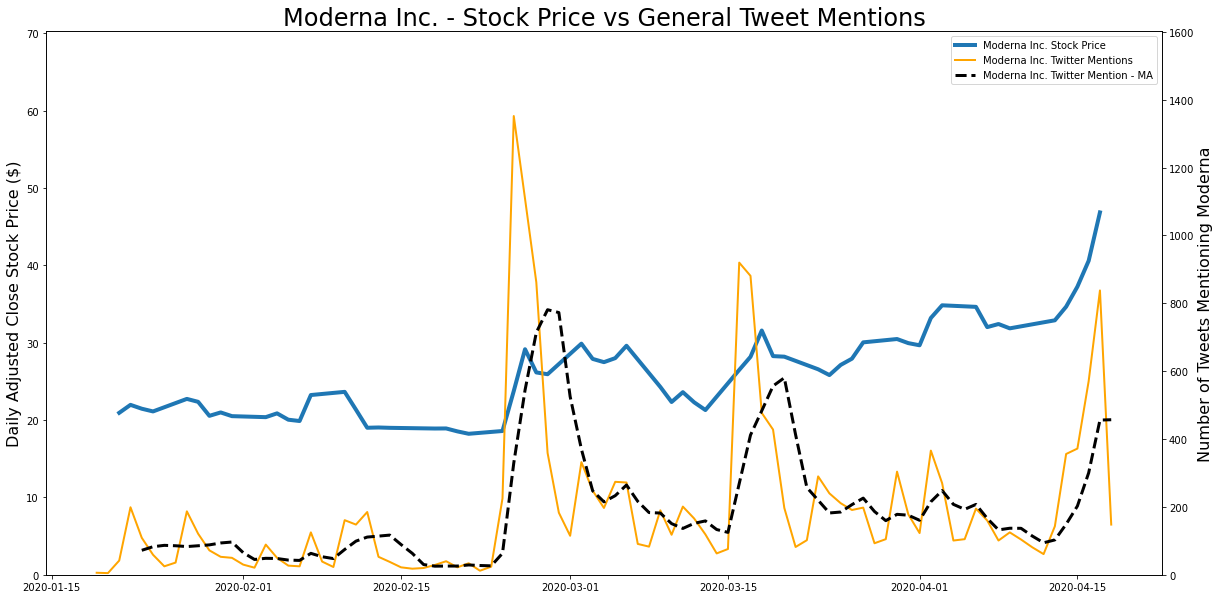

In [4]:
#time series of tweet volume vs stock price
company = nasdaq[nasdaq["Quandl_Code"] == "EOD/MRNA"].reset_index(drop = True)["Name"][0]
fig = plt.figure(figsize=(20,10))
ax1 = plt.axes()
ln1 = ax1.plot(MRNA_stock['Adj_Close'], linewidth=4)
ax2 = ax1.twinx()
ln2 = ax2.plot(MRNA_TweetsPerDay['Text'], color='orange', linewidth=2)
ln3 = ax2.plot(MRNA_TweetsPerDay['Count_MA'], color='black', linewidth=3, linestyle="--")
lns = ln1 + ln2 + ln3
ax1.set_title(company + ' - Stock Price vs General Tweet Mentions', size=24)
ax1.set_ylabel("Daily Adjusted Close Stock Price ($)", size=16)
ax2.set_ylabel("Number of Tweets Mentioning Moderna", size=16)
ax1.set_ylim(0,max(MRNA_stock['Adj_Close'])*1.5)
ax2.set_ylim(0,max(MRNA_TweetsPerDay['Text'].astype(int))+250)
ax1.legend(lns,[company + ' Stock Price',company + ' Twitter Mentions',company + ' Twitter Mention - MA'])

plt.show()

As we can see, the first huge spike in Twitter mentions is February 25, which slightly precedes the big jump in the stock price. Each subsequent big spike also precedes the jump in stock prices.
This indicates that the rise in Twitter mentions is positively correlated with the stock price.

### PayPal

In [5]:
#load paypal tweets and create a DataFrame
paypal_tweets = pd.read_csv('Data/CompanyTweets/PYPL_tweets.csv')

PYPL_TweetsPerDay = paypal_tweets.pivot_table(index='Created', values='Text', aggfunc='count')
PYPL_TweetsPerDay.reset_index(inplace=True)
PYPL_TweetsPerDay.sort_values(by='Text', ascending=False)

idx = pd.date_range("2020-1-19","2020-4-18")
PYPL_TweetsPerDay.index = pd.DatetimeIndex(PYPL_TweetsPerDay.Created)
PYPL_TweetsPerDay = PYPL_TweetsPerDay.reindex(idx, fill_value=0)
#looking at 5-day moving average to smoothen Twitter counts
PYPL_TweetsPerDay['Count_MA'] = PYPL_TweetsPerDay['Text'].rolling(window=5).mean()

del PYPL_TweetsPerDay['Created']

#load quandl data of paypal stock
PYPL_stock = quandl.get("EOD/PYPL", start_date='2020-1-19', end_date='2020-4-18')

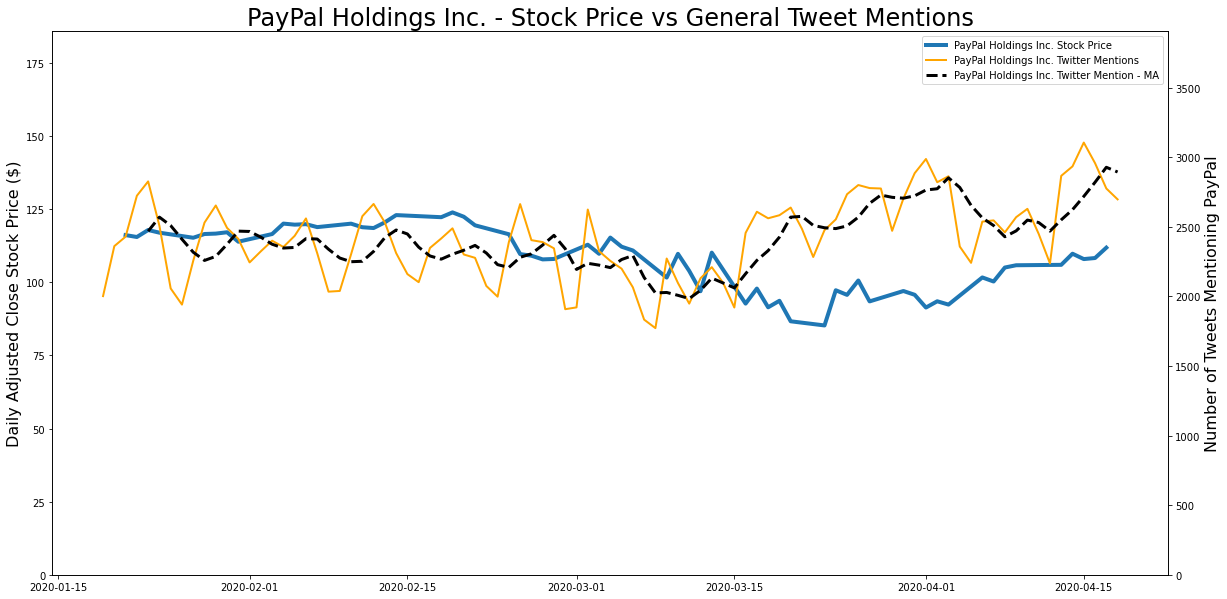

In [6]:
#time series of tweet volume vs stock price
company = nasdaq[nasdaq["Quandl_Code"] == "EOD/PYPL"].reset_index(drop = True)["Name"][0]
fig = plt.figure(figsize=(20,10))
ax1 = plt.axes()
ln1 = ax1.plot(PYPL_stock['Adj_Close'], linewidth=4)
ax2 = ax1.twinx()
ln2 = ax2.plot(PYPL_TweetsPerDay['Text'], color='orange', linewidth=2)
ln3 = ax2.plot(PYPL_TweetsPerDay['Count_MA'], color='black', linewidth=3, linestyle="--")
lns = ln1 + ln2 + ln3
ax1.set_title(company + ' - Stock Price vs General Tweet Mentions', size=24)
ax1.set_ylabel("Daily Adjusted Close Stock Price ($)", size=16)
ax2.set_ylabel("Number of Tweets Mentioning PayPal", size=16)
ax1.set_ylim(0,max(PYPL_stock['Adj_Close'])*1.5)
ax2.set_ylim(0,max(PYPL_TweetsPerDay['Text'].astype(int))+800)
ax1.legend(lns,[company + ' Stock Price',company + ' Twitter Mentions',company + ' Twitter Mention - MA'])

plt.show()

We can note a few things here. First, unlike the other two companies, PayPal did have a small dip from early March to mid March; its stock price recovered to mid January levels in mid April, which puts PayPal in a much better positions than the losers. This may indicate that PayPal was affected by overall market contraction since the company is relatively higly weighted in the NASDAQ index. Additionally, like the Moderna graph, Twitter mention peaks tended to preceded stock movements (positively correlating before March and negatively correlating in mid March).

### Zoom

In [7]:
#load zoom tweets and create a DataFrame
zoom_tweets = pd.read_csv('Data/CompanyTweets/ZM_tweets.csv')

ZM_TweetsPerDay = zoom_tweets.pivot_table(index='Created', values='Text', aggfunc='count')
ZM_TweetsPerDay.reset_index(inplace=True)
ZM_TweetsPerDay.sort_values(by='Text', ascending=False)

idx = pd.date_range("2020-1-19","2020-4-18")
ZM_TweetsPerDay.index = pd.DatetimeIndex(ZM_TweetsPerDay.Created)
ZM_TweetsPerDay = ZM_TweetsPerDay.reindex(idx, fill_value=0)
#looking at 5-day moving average to smoothen Twitter counts
ZM_TweetsPerDay['Count_MA'] = ZM_TweetsPerDay['Text'].rolling(window=5).mean()

del ZM_TweetsPerDay['Created']
#load quandl data of zoom stock
ZM_stock = quandl.get("EOD/ZM", start_date='2020-1-19', end_date='2020-4-18')

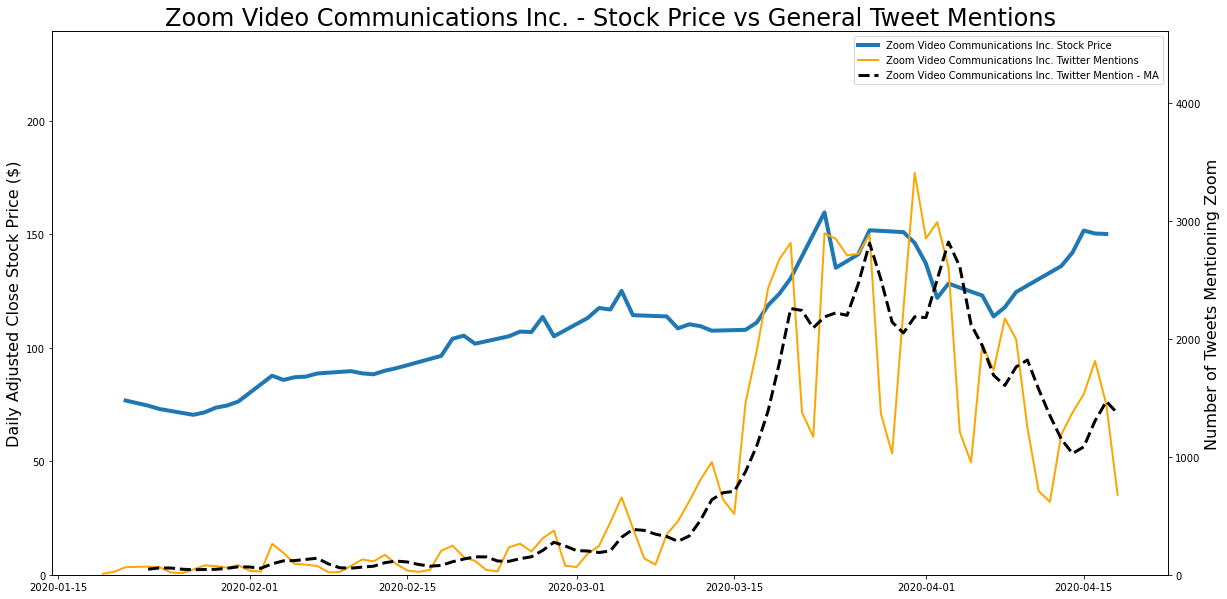

In [8]:
#time series of tweet volume vs stock price
company = nasdaq[nasdaq["Quandl_Code"] == "EOD/ZM"].reset_index(drop = True)["Name"][0]
fig = plt.figure(figsize=(20,10))
ax1 = plt.axes()
ln1 = ax1.plot(ZM_stock['Adj_Close'], linewidth = 4)
ax2 = ax1.twinx()
ln2 = ax2.plot(ZM_TweetsPerDay['Text'], color='orange', linewidth = 2)
ln3 = ax2.plot(ZM_TweetsPerDay['Count_MA'], color='black', linewidth=3, linestyle="--")
lns = ln1 + ln2 + ln3
ax1.set_title(company + ' - Stock Price vs General Tweet Mentions', size=24)
ax1.set_ylabel("Daily Adjusted Close Stock Price ($)", size=16)
ax2.set_ylabel("Number of Tweets Mentioning Zoom", size=16)
ax1.set_ylim(0,max(ZM_stock['Adj_Close'])*1.5)
ax2.set_ylim(0,max(ZM_TweetsPerDay['Text'].astype(int))+1200)
ax1.legend(lns,[company + ' Stock Price',company + ' Twitter Mentions',company + ' Twitter Mention - MA'])

plt.show()

From this graph, we can point out a few patterns of interest. First, Zoom was on a relatively steadily growing pace, but the huge spike in Twitter mentions in mid March were reflected in the stock price. As Twitter mentions relatively waned in early April, so did the stock price, though spikes still preceded stock increases; this illustrates a positive corrlelation between Twitter mentions and stock price.

# Covid Mentions

## Volume Covid Mentions

In [9]:
#Find mentions of covid in company tweets
ListofCovidTerms = ['coronavirus', 'covid', 'covid19','mask', '#coronavirus', '#covid','#covid19','#mask']
pattern = "|".join(ListofCovidTerms)

moderna_tweets['CovidTermContained'] = moderna_tweets.Text.apply(lambda x: x.lower()).str.contains(pattern).apply(lambda x: int(x))
paypal_tweets['CovidTermContained'] = paypal_tweets.Text.apply(lambda x: x.lower()).str.contains(pattern).apply(lambda x: int(x))
zoom_tweets['CovidTermContained'] = zoom_tweets.Text.apply(lambda x: x.lower()).str.contains(pattern).apply(lambda x: int(x))

#create Dataframe of covid tweets
MRNA_Summary = moderna_tweets.pivot_table(index= 'Created', values=['CovidTermContained'], aggfunc=np.sum)
MRNA_Summary.index.names = ['Date']
MRNA_Summary.index = pd.to_datetime(MRNA_Summary.index)
MRNA_Summary['CovidContained_MA'] = MRNA_Summary['CovidTermContained'].rolling(window=5).mean()

PYPL_Summary = paypal_tweets.pivot_table(index= 'Created', values=['CovidTermContained'], aggfunc=np.sum)
PYPL_Summary.index.names = ['Date']
PYPL_Summary.index = pd.to_datetime(PYPL_Summary.index)
PYPL_Summary['CovidContained_MA'] = PYPL_Summary['CovidTermContained'].rolling(window=5).mean()

ZM_Summary = zoom_tweets.pivot_table(index= 'Created', values=['CovidTermContained'], aggfunc=np.sum)
ZM_Summary.index.names = ['Date']
ZM_Summary.index = pd.to_datetime(ZM_Summary.index)
ZM_Summary['CovidContained_MA'] = ZM_Summary['CovidTermContained'].rolling(window=5).mean()

### Moderna

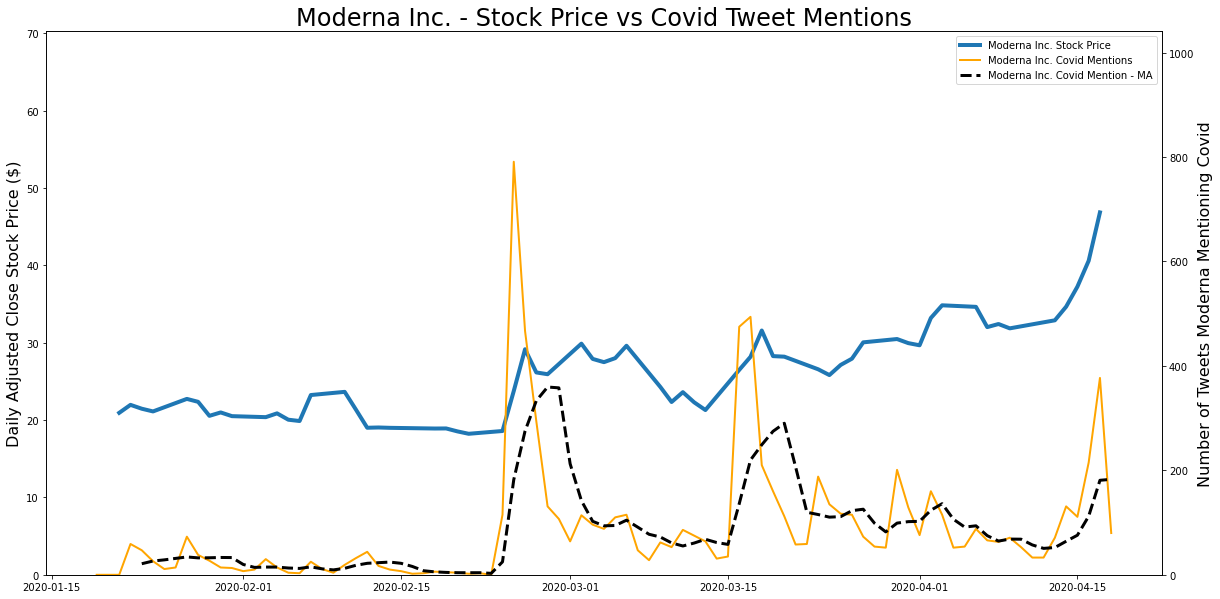

In [10]:
#time series of covid tweet volume vs stock price
company = nasdaq[nasdaq["Quandl_Code"] == "EOD/MRNA"].reset_index(drop = True)["Name"][0]
fig = plt.figure(figsize=(20,10))
ax1 = plt.axes()
ln1 = ax1.plot(MRNA_stock['Adj_Close'], linewidth=4)
ax2 = ax1.twinx()
ln2 = ax2.plot(MRNA_Summary['CovidTermContained'], color='orange', linewidth=2)
ln3 = ax2.plot(MRNA_Summary['CovidContained_MA'], color='black', linewidth=3, linestyle="--")
lns = ln1 + ln2 + ln3
ax1.set_title(company + ' - Stock Price vs Covid Tweet Mentions', size=24)
ax1.set_ylabel("Daily Adjusted Close Stock Price ($)", size=16)
ax2.set_ylabel("Number of Tweets Moderna Mentioning Covid", size=16)
ax1.set_ylim(0,max(MRNA_stock['Adj_Close'])*1.5)
ax2.set_ylim(0,max(MRNA_Summary['CovidTermContained'].astype(int))+250)
ax1.legend(lns,[company + ' Stock Price',company + ' Covid Mentions',company + ' Covid Mention - MA'])

plt.show()

As we saw in the previous Moderna graph, the tweet spikes preceded stock price spikes (i.e. Covid mentions look positively correlated with stock price), with the largest spike occuring February 25. 

### PayPal

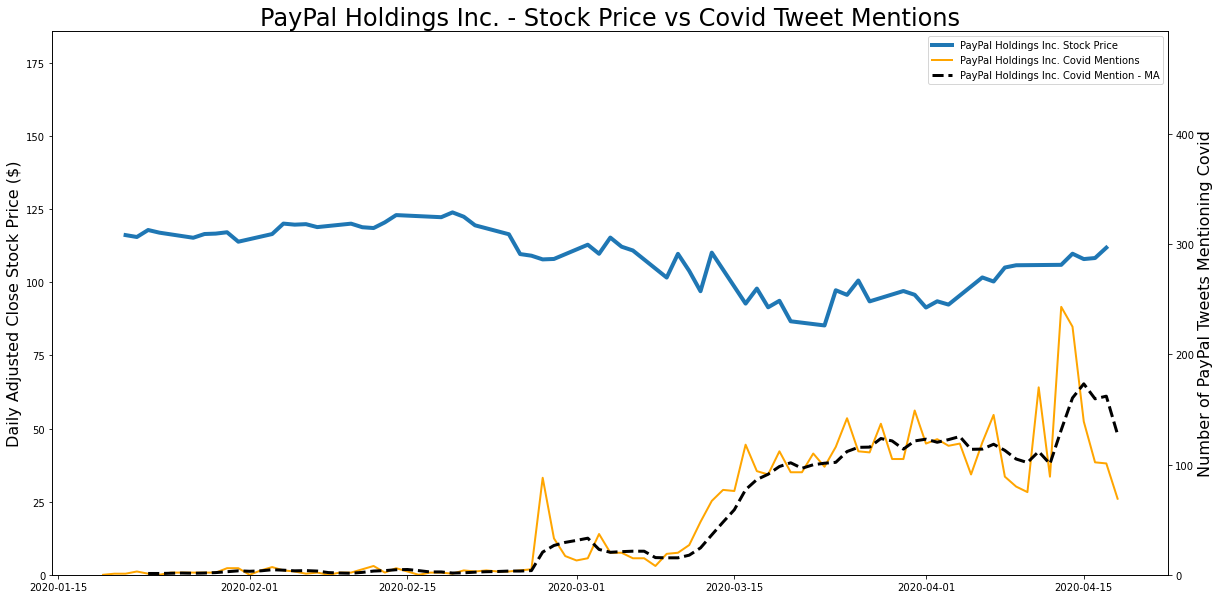

In [11]:
#time series of covid tweet volume vs stock price
company = nasdaq[nasdaq["Quandl_Code"] == "EOD/PYPL"].reset_index(drop = True)["Name"][0]
fig = plt.figure(figsize=(20,10))
ax1 = plt.axes()
ln1 = ax1.plot(PYPL_stock['Adj_Close'], linewidth=4)
ax2 = ax1.twinx()
ln2 = ax2.plot(PYPL_Summary['CovidTermContained'], color='orange', linewidth=2)
ln3 = ax2.plot(PYPL_Summary['CovidContained_MA'], color='black', linewidth=3, linestyle="--")
lns = ln1 + ln2 + ln3
ax1.set_title(company + ' - Stock Price vs Covid Tweet Mentions', size=24)
ax1.set_ylabel("Daily Adjusted Close Stock Price ($)", size=16)
ax2.set_ylabel("Number of PayPal Tweets Mentioning Covid", size=16)
ax1.set_ylim(0,max(PYPL_stock['Adj_Close'])*1.5)
ax2.set_ylim(0,max(PYPL_Summary['CovidTermContained'].astype(int))+250)
ax1.legend(lns,[company + ' Stock Price',company + ' Covid Mentions',company + ' Covid Mention - MA'])

plt.show()

As we saw in the previous PayPal graph, the trends between Covid mentions and stock prices look like a mix of trends in the "winning" companies and "losing" companies. Before March, Covid mentions were relatively positively correlated with the stock price. On February 25, a huge spike in Covid mentions appears to coincide with a drop in stock price, a harbinger to the rise in Covid mentions and drop in stock price in mid March. By late March, Twitter mentions and stocks prices appear to have become positively correlated again.

### Zoom

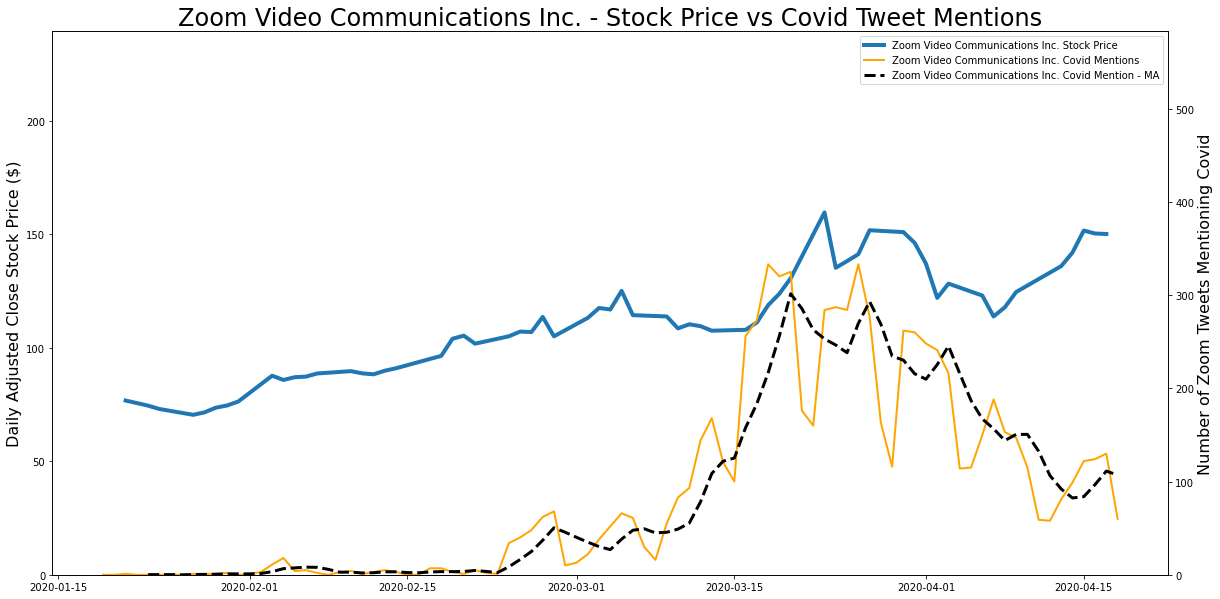

In [12]:
#time series of covid tweet volume vs stock price
company = nasdaq[nasdaq["Quandl_Code"] == "EOD/ZM"].reset_index(drop = True)["Name"][0]
fig = plt.figure(figsize=(20,10))
ax1 = plt.axes()
ln1 = ax1.plot(ZM_stock['Adj_Close'], linewidth=4)
ax2 = ax1.twinx()
ln2 = ax2.plot(ZM_Summary['CovidTermContained'], color='orange', linewidth=2)
ln3 = ax2.plot(ZM_Summary['CovidContained_MA'], color='black', linewidth=3, linestyle="--")
lns = ln1 + ln2 + ln3
ax1.set_title(company + ' - Stock Price vs Covid Tweet Mentions', size=24)
ax1.set_ylabel("Daily Adjusted Close Stock Price ($)", size=16)
ax2.set_ylabel("Number of Zoom Tweets Mentioning Covid", size=16)
ax1.set_ylim(0,max(ZM_stock['Adj_Close'])*1.5)
ax2.set_ylim(0,max(ZM_Summary['CovidTermContained'].astype(int))+250)
ax1.legend(lns,[company + ' Stock Price',company + ' Covid Mentions',company + ' Covid Mention - MA'])

plt.show()

Like the previous Zoom graph, spikes in Covid mentions preceded rises in stock price, which indicates that the two are positively correlated. The relative precipitous increase in Covid mentions in mid March with the jump in stock price indicates that Zoom was benefited by the effects of Covid. 

## Percentage Covid Mentions

In [13]:
#get the proportion of Covid tweets to Company tweets
MRNA_Summary['covid_prop'] = MRNA_Summary['CovidTermContained']/MRNA_TweetsPerDay['Text']
PYPL_Summary['covid_prop'] = PYPL_Summary['CovidTermContained']/PYPL_TweetsPerDay['Text']
ZM_Summary['covid_prop'] = ZM_Summary['CovidTermContained']/ZM_TweetsPerDay['Text']
MRNA_Summary['covid_prop_MA'] = MRNA_Summary['covid_prop'].rolling(window=5).mean()
PYPL_Summary['covid_prop_MA'] = PYPL_Summary['covid_prop'].rolling(window=5).mean()
ZM_Summary['covid_prop_MA'] = ZM_Summary['covid_prop'].rolling(window=5).mean()

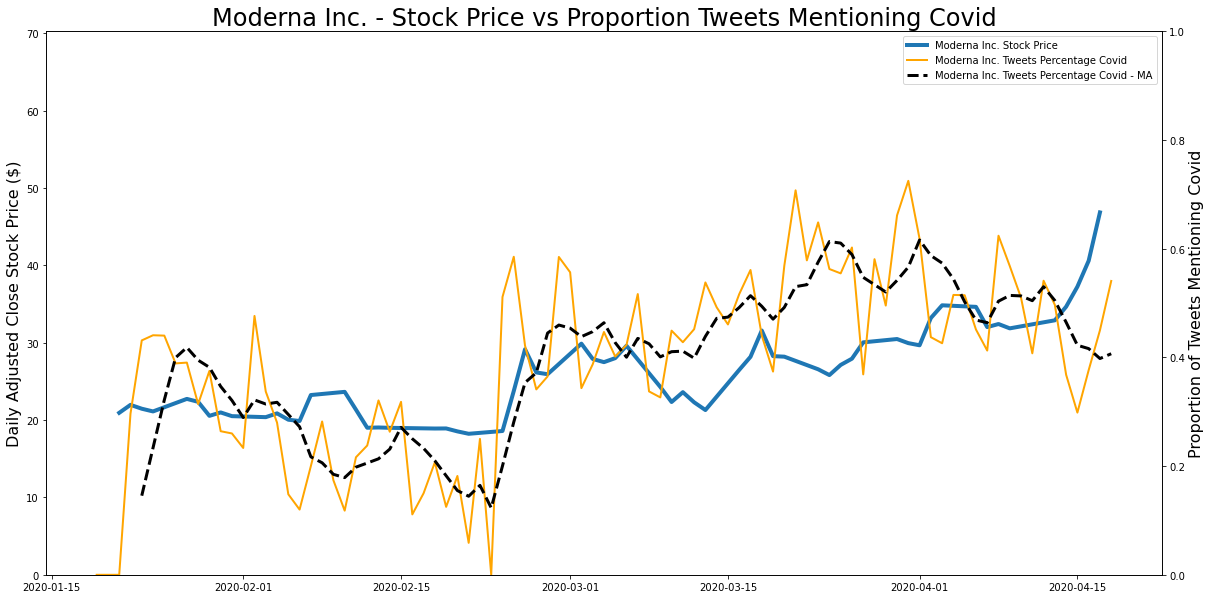

In [14]:
#time series of covid tweet volume vs stock price
company = nasdaq[nasdaq["Quandl_Code"] == "EOD/MRNA"].reset_index(drop = True)["Name"][0]
fig = plt.figure(figsize=(20,10))
ax1 = plt.axes()
ln1 = ax1.plot(MRNA_stock['Adj_Close'], linewidth = 4)
ax2 = ax1.twinx()
ln2 = ax2.plot(MRNA_Summary['covid_prop'], color='orange', linewidth = 2)
ln3 = ax2.plot(MRNA_Summary['covid_prop_MA'], color='black', linewidth=3, linestyle="--")
lns = ln1 + ln2 + ln3
ax1.set_title(company + " - Stock Price vs Proportion Tweets Mentioning Covid", size=24)
#ax1.rcParams["figure.figsize"] = (20,10)
ax1.set_ylabel("Daily Adjusted Close Stock Price ($)", size=16)
ax2.set_ylabel("Proportion of Tweets Mentioning Covid", size=16)
ax1.set_ylim(0,max(MRNA_stock['Adj_Close'])*1.5)
ax1.legend(lns,[company + ' Stock Price',company + ' Tweets Percentage Covid',company + ' Tweets Percentage Covid - MA'])

ax2.set_ylim(0,1)
plt.show()

We see that the percentage of Covid mentions positively correlates to stock price, especially after the jump in both on February 25. Additionally, the proportion is relatively high after February 25 with a moving average of at least 40% of the total tweets.

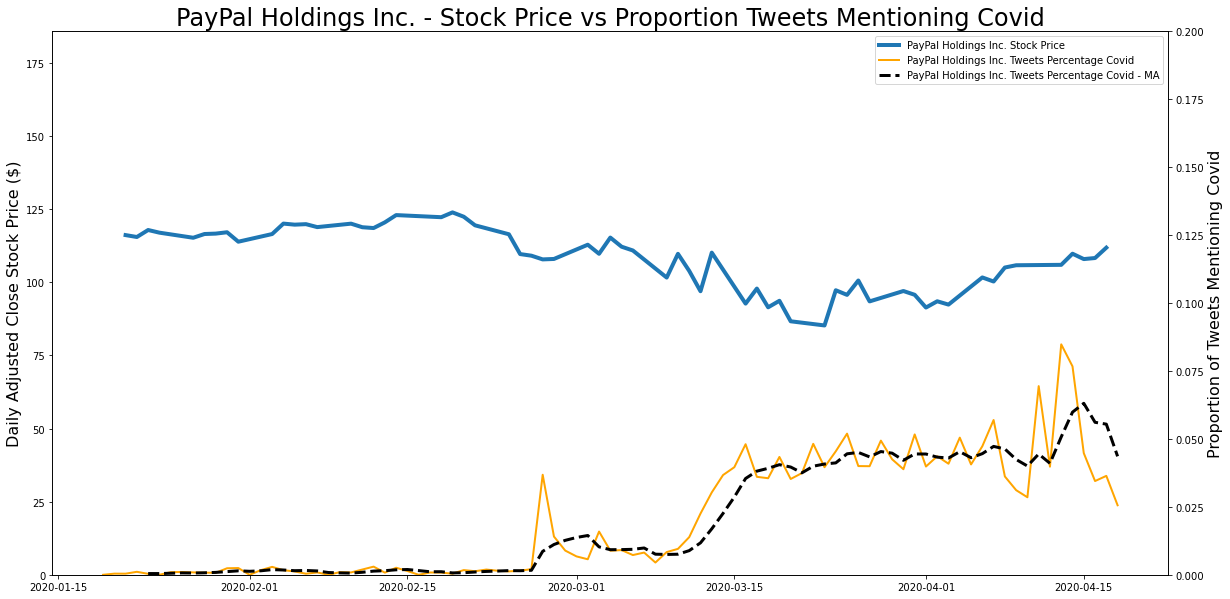

In [15]:
#time series of covid tweet volume vs stock price
company = nasdaq[nasdaq["Quandl_Code"] == "EOD/PYPL"].reset_index(drop = True)["Name"][0]
fig = plt.figure(figsize=(20,10))
ax1 = plt.axes()
ln1 = ax1.plot(PYPL_stock['Adj_Close'], linewidth = 4)
ax2 = ax1.twinx()
ln2 = ax2.plot(PYPL_Summary['covid_prop'], color='orange', linewidth = 2)
ln3 = ax2.plot(PYPL_Summary['covid_prop_MA'], color='black', linewidth=3, linestyle="--")
lns = ln1 + ln2 + ln3
ax1.set_title(company + " - Stock Price vs Proportion Tweets Mentioning Covid", size=24)
#ax1.rcParams["figure.figsize"] = (20,10)
ax1.set_ylabel("Daily Adjusted Close Stock Price ($)", size=16)
ax2.set_ylabel("Proportion of Tweets Mentioning Covid", size=16)
ax1.set_ylim(0,max(PYPL_stock['Adj_Close'])*1.5)
ax1.legend(lns,[company + ' Stock Price',company + ' Tweets Percentage Covid',company + ' Tweets Percentage Covid - MA'])

ax2.set_ylim(0,0.2)
plt.show()

The same patterns are reflected in the Percentage of Covid mentions and stock prices as in the previous PayPal graph. Do note, however, that the overall proportion of Covid mentions is extremely low compared to the other "winning" companies - the highest peck of Covid mentions only accounted for about 10% of total tweets mentioning the company that day.

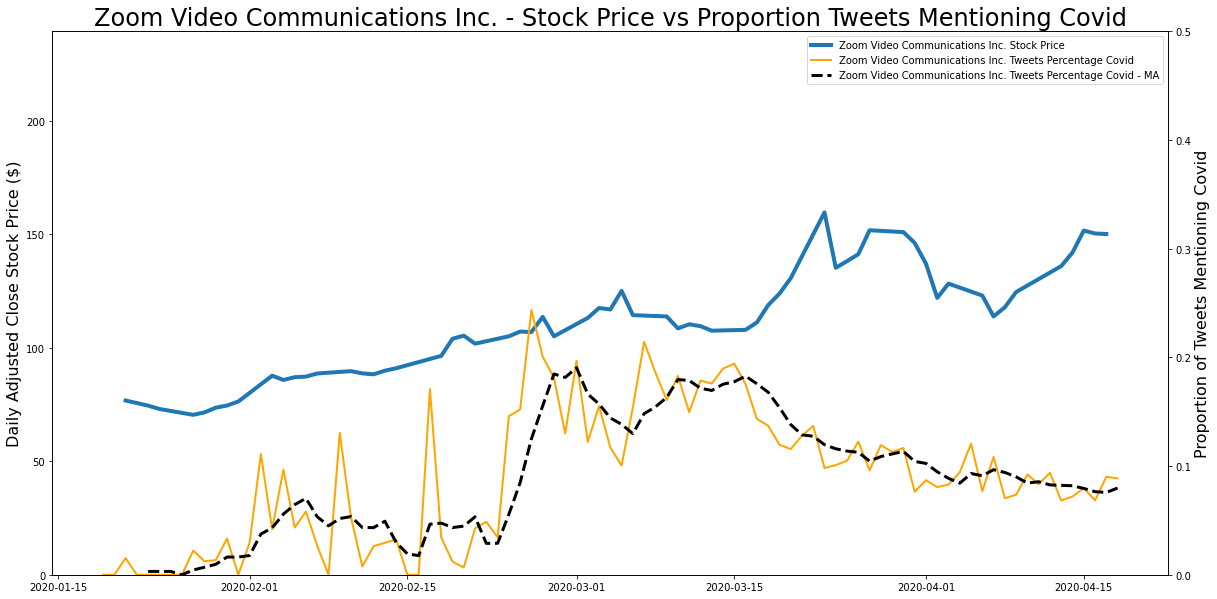

In [16]:
#time series of covid tweet volume vs stock price
company = nasdaq[nasdaq["Quandl_Code"] == "EOD/ZM"].reset_index(drop = True)["Name"][0]
fig = plt.figure(figsize=(20,10))
ax1 = plt.axes()
ln1 = ax1.plot(ZM_stock['Adj_Close'], linewidth = 4)
ax2 = ax1.twinx()
ln2 = ax2.plot(ZM_Summary['covid_prop'], color='orange', linewidth = 2)
ln3 = ax2.plot(ZM_Summary['covid_prop_MA'], color='black', linewidth=3, linestyle="--")
lns = ln1 + ln2 + ln3
ax1.set_title(company + " - Stock Price vs Proportion Tweets Mentioning Covid", size=24)
#ax1.rcParams["figure.figsize"] = (20,10)
ax1.set_ylabel("Daily Adjusted Close Stock Price ($)", size=16)
ax2.set_ylabel("Proportion of Tweets Mentioning Covid", size=16)
ax1.set_ylim(0,max(ZM_stock['Adj_Close'])*1.5)
ax1.legend(lns,[company + ' Stock Price',company + ' Tweets Percentage Covid',company + ' Tweets Percentage Covid - MA'])

ax2.set_ylim(0,0.5)
plt.show()

This graph of Zoom presents and interesting difference from the previous Zoom graphs. We see that precentage of Covid mentions spiked around February 25, but overall percentage of Covid mentions decline since then. This indicates that the total volume of tweets mentioning the company were growing relative to the high number of Covid mentions in March. 

# Emoji Analysis 

In [21]:
#Moderna emojis
MRNA_covid = moderna_tweets[['Created','Text']]
MRNA_emoji = extract_emoji(MRNA_covid.Text.tolist())

In [23]:
PYPL_covid = paypal_tweets[['Created','Text']]
PYPL_emoji = extract_emoji(PYPL_covid.Text.tolist())

In [ ]:
ZM_covid = zoom_tweets[['Created','Text']]
ZM_emoji = extract_emoji(ZM_covid.Text.tolist())

In [24]:
#top 20 emojis (red circle does not count)
top_emojis = (Counter(dict(MRNA_emoji['top_emoji'])) + Counter(dict(PYPL_emoji['top_emoji'])) + Counter(dict(ZM_emoji['top_emoji'])) ).items()
top_emojis = sorted(list(top_emojis),key = lambda x: x[1], reverse = True)
top_emojis = [tup[0] for tup in top_emojis][:21]
top_emojis

In [407]:
positive_emojis = '💰❤️✨✅🔥😂💸🙏💵💕🥰⭐🚨😊😘‼️💜'
negative_emojis = '😭👇🥺'

We see that the top 20 sentiment-identifiable emojis among the winning companies are overhelmingly positive, which will be reflected in the graphs.

### Moderna

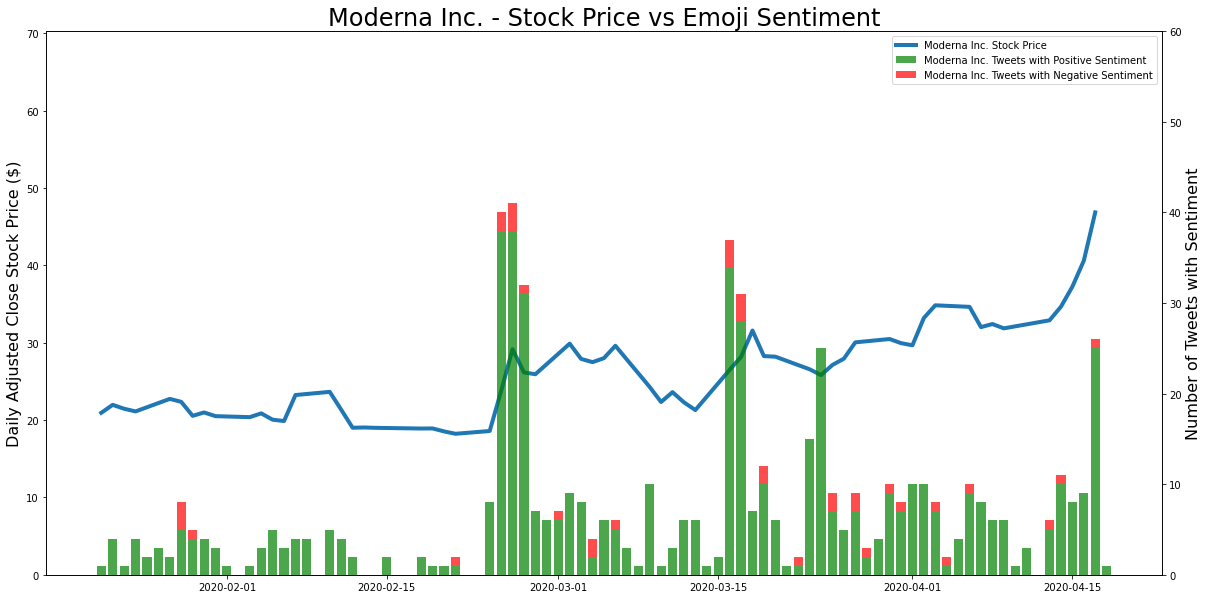

In [438]:
MRNA_covid['emoji'] = MRNA_emoji['emoji']
MRNA_covid.emoji = [''.join(ele) for ele in MRNA_covid.emoji] 
MRNA_covid = MRNA_covid.reset_index(drop = True)
MRNA_emoji_sentiment = MRNA_covid[MRNA_covid['emoji'] != ''].reset_index(drop = True)
MRNA_emoji_sentiment['pos_emoji'] = MRNA_emoji_sentiment['emoji'].str.replace("[^💰❤️✨✅🔥😂💸🙏💵💕🥰⭐🚨😊😘‼️💜]","")
MRNA_emoji_sentiment['neg_emoji'] = MRNA_emoji_sentiment['emoji'].str.replace("[^😭👇🥺]","")
MRNA_emoji_sentiment['sentiment_count'] = MRNA_emoji_sentiment['pos_emoji'].str.len() - MRNA_emoji_sentiment['neg_emoji'].str.len()
MRNA_emoji_sentiment["Emoji Positive"] = MRNA_emoji_sentiment["sentiment_count"].apply(lambda x: 1 if x>0 else 0)
MRNA_emoji_sentiment["Emoji Negative"] = MRNA_emoji_sentiment["sentiment_count"].apply(lambda x: 1 if x<0 else 0)

tweetdf = MRNA_emoji_sentiment.pivot_table(index='Created', values=['Emoji Positive', 'Emoji Negative'], aggfunc=np.sum)
tweetdf.index.names = ['Date']
tweetdf.index = pd.to_datetime(tweetdf.index) 

#time series of sentiment vs stock price
company = nasdaq[nasdaq["Quandl_Code"] == "EOD/MRNA"].reset_index(drop = True)["Name"][0]

fig = plt.figure(figsize=(20,10))
ax1 = plt.axes()
ln1 = ax1.plot(MRNA_stock['Adj_Close'], linewidth = 4)
ax2 = ax1.twinx()
ln2 = ax2.bar(tweetdf.index,tweetdf['Emoji Positive'], color='green',alpha=0.7)
ln3 = ax2.bar(tweetdf.index,tweetdf['Emoji Negative'], color='red',bottom = tweetdf['Emoji Positive'],alpha=0.7)
lns = ln1 + [ln2] + [ln3]
ax1.set_title(company + ' - Stock Price vs Emoji Sentiment', size=24)
#ax1.rcParams["figure.figsize"] = (20,10)
ax1.set_ylabel("Daily Adjusted Close Stock Price ($)", size=16)
ax2.set_ylabel("Number of Tweets with Sentiment", size=16)
ax1.set_ylim(0,max(MRNA_stock['Adj_Close'])*1.5)
ax2.set_ylim(0,max(tweetdf["Emoji Negative"]) + max(tweetdf["Emoji Positive"])*1.5)
ax1.legend(lns,[company + ' Stock Price', company + ' Tweets with Positive Sentiment', company + ' Tweets with Negative Sentiment'])
plt.show()

Like in previous Moderna graphs, spikes in tweet volume positively correlate to stock prices. We see that tweets with positive sentiment far outnumber the number of tweets with negative sentiment.

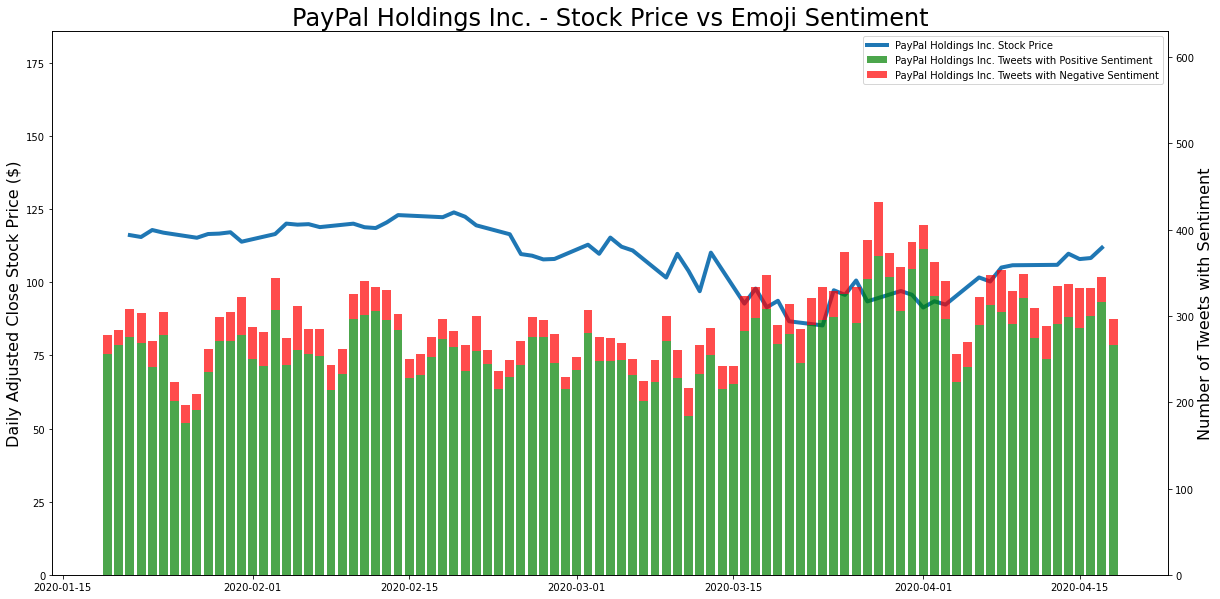

In [439]:
PYPL_covid['emoji'] = PYPL_emoji['emoji']
PYPL_covid.emoji = [''.join(ele) for ele in PYPL_covid.emoji] 
PYPL_covid = PYPL_covid.reset_index(drop = True)
PYPL_emoji_sentiment = PYPL_covid[PYPL_covid['emoji'] != ''].reset_index(drop = True)
PYPL_emoji_sentiment['pos_emoji'] = PYPL_emoji_sentiment['emoji'].str.replace("[^💰❤️✨✅🔥😂💸🙏💵💕🥰⭐🚨😊😘‼️💜]","")
PYPL_emoji_sentiment['neg_emoji'] = PYPL_emoji_sentiment['emoji'].str.replace("[^😭👇🥺]","")
PYPL_emoji_sentiment['sentiment_count'] = PYPL_emoji_sentiment['pos_emoji'].str.len() - PYPL_emoji_sentiment['neg_emoji'].str.len()
PYPL_emoji_sentiment["Emoji Positive"] = PYPL_emoji_sentiment["sentiment_count"].apply(lambda x: 1 if x>0 else 0)
PYPL_emoji_sentiment["Emoji Negative"] = PYPL_emoji_sentiment["sentiment_count"].apply(lambda x: 1 if x<0 else 0)

tweetdf = PYPL_emoji_sentiment.pivot_table(index='Created', values=['Emoji Positive', 'Emoji Negative'], aggfunc=np.sum)
tweetdf.index.names = ['Date']
tweetdf.index = pd.to_datetime(tweetdf.index) 

#time series of sentiment vs stock price
company = nasdaq[nasdaq["Quandl_Code"] == "EOD/PYPL"].reset_index(drop = True)["Name"][0]

fig = plt.figure(figsize=(20,10))
ax1 = plt.axes()
ln1 = ax1.plot(PYPL_stock['Adj_Close'], linewidth = 4)
ax2 = ax1.twinx()
ln2 = ax2.bar(tweetdf.index,tweetdf['Emoji Positive'], color='green',alpha=0.7)
ln3 = ax2.bar(tweetdf.index,tweetdf['Emoji Negative'], color='red',bottom = tweetdf['Emoji Positive'],alpha=0.7)
lns = ln1 + [ln2] + [ln3]
ax1.set_title(company + ' - Stock Price vs Emoji Sentiment', size=24)
ax1.set_ylabel("Daily Adjusted Close Stock Price ($)", size=16)
ax2.set_ylabel("Number of Tweets with Sentiment", size=16)
ax1.set_ylim(0,max(PYPL_stock['Adj_Close'])*1.5)
ax2.set_ylim(0,max(tweetdf["Emoji Negative"]) + max(tweetdf["Emoji Positive"])*1.5)
ax1.legend(lns,[company + ' Stock Price', company + ' Tweets with Positive Sentiment', company + ' Tweets with Negative Sentiment'])
plt.show()

The tweet volume is considerably more uniform here than in the Moderna graph, though the same trends from previous PayPal graphs apply here - positive correlation before March, negative correlation until late March, and positive correlation afterwards. It should be noted that there is a considerably higher number of tweets with negative sentiment here than in the Moderna graph.

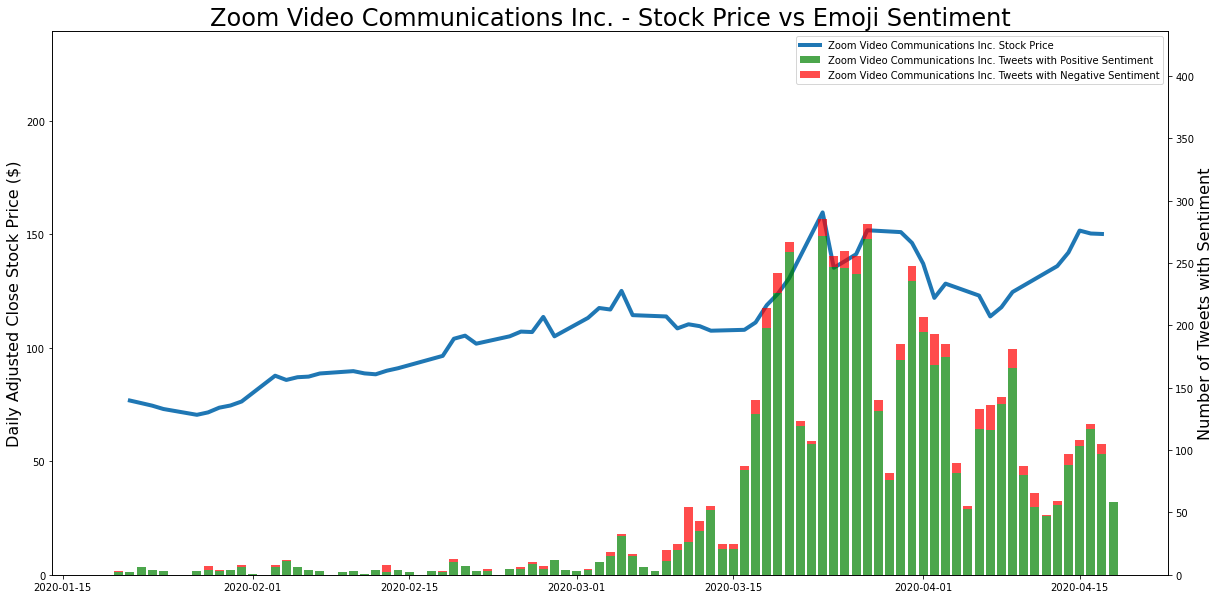

In [441]:
ZM_covid['emoji'] = ZM_emoji['emoji']
ZM_covid.emoji = [''.join(ele) for ele in ZM_covid.emoji] 
ZM_covid = ZM_covid.reset_index(drop = True)
ZM_emoji_sentiment = ZM_covid[ZM_covid['emoji'] != ''].reset_index(drop = True)
ZM_emoji_sentiment['pos_emoji'] = ZM_emoji_sentiment['emoji'].str.replace("[^💰❤️✨✅🔥😂💸🙏💵💕🥰⭐🚨😊😘‼️💜]","")
ZM_emoji_sentiment['neg_emoji'] = ZM_emoji_sentiment['emoji'].str.replace("[^😭👇🥺]","")
ZM_emoji_sentiment['sentiment_count'] = ZM_emoji_sentiment['pos_emoji'].str.len() - ZM_emoji_sentiment['neg_emoji'].str.len()
ZM_emoji_sentiment["Emoji Positive"] = ZM_emoji_sentiment["sentiment_count"].apply(lambda x: 1 if x>0 else 0)
ZM_emoji_sentiment["Emoji Negative"] = ZM_emoji_sentiment["sentiment_count"].apply(lambda x: 1 if x<0 else 0)

tweetdf = ZM_emoji_sentiment.pivot_table(index='Created', values=['Emoji Positive', 'Emoji Negative'], aggfunc=np.sum)
tweetdf.index.names = ['Date']
tweetdf.index = pd.to_datetime(tweetdf.index) 

#time series of sentiment vs stock price
company = nasdaq[nasdaq["Quandl_Code"] == "EOD/ZM"].reset_index(drop = True)["Name"][0]

fig = plt.figure(figsize=(20,10))
ax1 = plt.axes()
ln1 = ax1.plot(ZM_stock['Adj_Close'], linewidth = 4)
ax2 = ax1.twinx()
ln2 = ax2.bar(tweetdf.index,tweetdf['Emoji Positive'], color='green',alpha=0.7)
ln3 = ax2.bar(tweetdf.index,tweetdf['Emoji Negative'], color='red',bottom = tweetdf['Emoji Positive'],alpha=0.7)
lns = ln1 + [ln2] + [ln3]
ax1.set_title(company + ' - Stock Price vs Emoji Sentiment', size=24)
ax1.set_ylabel("Daily Adjusted Close Stock Price ($)", size=16)
ax2.set_ylabel("Number of Tweets with Sentiment", size=16)
ax1.set_ylim(0,max(ZM_stock['Adj_Close'])*1.5)
ax2.set_ylim(0,max(tweetdf["Emoji Negative"]) + max(tweetdf["Emoji Positive"])*1.5)
ax1.legend(lns,[company + ' Stock Price', company + ' Tweets with Positive Sentiment', company + ' Tweets with Negative Sentiment'])
plt.show()

Like the previous Zoom graphs, this Zoom graph demonstrates positive correlation between the Tweet volume and the stock price with a large ramp up starting in mid March and tapering off. 